In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import imblearn
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

df = pd.read_csv("policefinal.csv")
df = df[['Descript', 'CrimeClass']]
X = df.Descript
y = df.CrimeClass
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)
naive_bayes = MultinomialNB()

In [149]:
print(df[df.CrimeClass == 'LOSS OF LIFE'])

                               Descript    CrimeClass
2180    ATTEMPTED SUICIDE BY LACERATION  LOSS OF LIFE
4279     ATTEMPTED SUICIDE BY INGESTION  LOSS OF LIFE
6310                 SUICIDE BY JUMPING  LOSS OF LIFE
6848       ATTEMPTED SUICIDE BY JUMPING  LOSS OF LIFE
8571       ATTEMPTED SUICIDE BY JUMPING  LOSS OF LIFE
...                                 ...           ...
120508                          SUICIDE  LOSS OF LIFE
131626                ATTEMPTED SUICIDE  LOSS OF LIFE
142882              SUICIDE BY FIREARMS  LOSS OF LIFE
148966   ATTEMPTED SUICIDE BY INGESTION  LOSS OF LIFE
150164                ATTEMPTED SUICIDE  LOSS OF LIFE

[69 rows x 2 columns]


In [150]:
pd.DataFrame(y_train).CrimeClass.value_counts()

THEFT                42429
OTHER CRIMES         28149
PUBLIC MISCONDUCT    16112
ASSAULT              11457
PROPERTY DAMAGE       7287
MISSING PERSON        3523
CORRUPTION            2671
SEX OFFENSES          1191
LOSS OF LIFE            56
Name: CrimeClass, dtype: int64

In [151]:
rus = RandomUnderSampler(return_indices=False, ratio={'THEFT': 30000, 'OTHER CRIMES': 20000, 'PUBLIC MISCONDUCT': 15000, 'ASSAULT': 10000, 'PROPERTY DAMAGE': 7287, 'MISSING PERSON': 3523, 'CORRUPTION': 2671, 'SEX OFFENSES': 1191, 'LOSS OF LIFE':56})
X_rus, y_rus = rus.fit_sample(X_train_cv, y_train)
# print('Removed indexes:', id_rus)

In [152]:
pd.DataFrame(y_rus)[0].value_counts()

THEFT                30000
OTHER CRIMES         20000
PUBLIC MISCONDUCT    15000
ASSAULT              10000
PROPERTY DAMAGE       7287
MISSING PERSON        3523
CORRUPTION            2671
SEX OFFENSES          1191
LOSS OF LIFE            56
Name: 0, dtype: int64

In [153]:
ros = RandomOverSampler(return_indices=False, ratio={'THEFT': 30000, 'OTHER CRIMES': 20000, 'PUBLIC MISCONDUCT': 15000, 'ASSAULT': 10000, 'PROPERTY DAMAGE': 10000, 'MISSING PERSON': 5000, 'CORRUPTION': 5000, 'SEX OFFENSES': 5000, 'LOSS OF LIFE':5000})
X_ros, y_ros = ros.fit_sample(X_rus, y_rus)
# print('Removed indexes:', id_rus)

In [154]:
pd.DataFrame(y_ros)[0].value_counts()

THEFT                30000
OTHER CRIMES         20000
PUBLIC MISCONDUCT    15000
ASSAULT              10000
PROPERTY DAMAGE      10000
LOSS OF LIFE          5000
SEX OFFENSES          5000
MISSING PERSON        5000
CORRUPTION            5000
Name: 0, dtype: int64

In [155]:
pd.DataFrame(y_test).CrimeClass.value_counts()

THEFT                14236
OTHER CRIMES          9320
PUBLIC MISCONDUCT     5285
ASSAULT               3778
PROPERTY DAMAGE       2470
MISSING PERSON        1212
CORRUPTION             877
SEX OFFENSES           434
LOSS OF LIFE            13
Name: CrimeClass, dtype: int64

In [156]:
naive_bayes.fit(X_ros, y_ros)
predictions = naive_bayes.predict(X_test_cv)

In [157]:
print('Accuracy score: ', accuracy_score(y_test, predictions))
print('Precision score: ', precision_score(y_test, predictions, average='weighted'))
print('Recall score: ', recall_score(y_test, predictions, average='weighted'))
print('F1 score: ', f1_score(y_test, predictions, average='weighted'))

Accuracy score:  0.9935415282392026
Precision score:  0.99365873044533
Recall score:  0.9935415282392026
F1 score:  0.9935734824694492


Text(69.0, 0.5, 'predicted label')

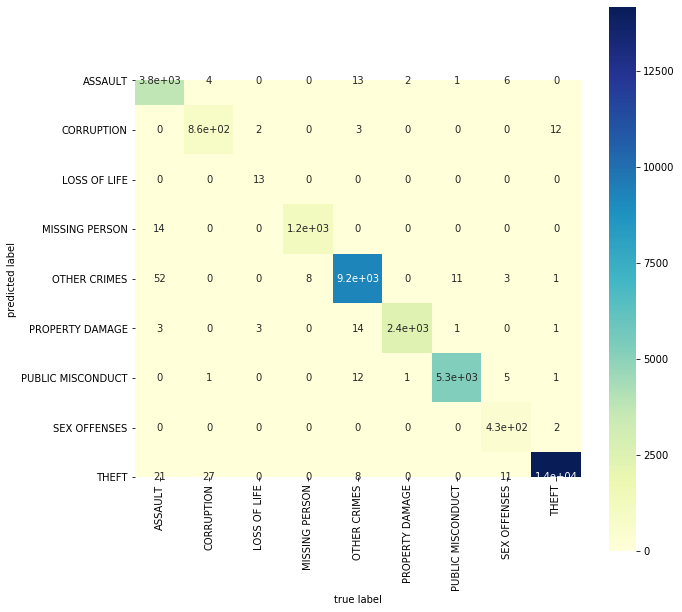

In [158]:
classes = classes = sorted(df.CrimeClass.unique())
cm = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, square=True, annot=True, cmap='YlGnBu', cbar=True, xticklabels=classes, yticklabels=classes, ax=ax)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [159]:
predict = pd.DataFrame({'Descript': ["ATTEMPTED SUICIDE BY FIREARM"], "CrimeClass": ['Unknown']})
predict_x = predict['Descript']
predict_x_cv = cv.transform(predict_x)
detected = naive_bayes.predict(predict_x_cv)
print(detected)

['LOSS OF LIFE']
